In [80]:
#neglate userwarnings
import warnings
from warnings import filterwarnings
warnings.filterwarnings('ignore',category=UserWarning)


# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import plotly.express as px
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [81]:
# load data
df = pd.read_csv("C:/localD/sem5/EE5253-Machine Learning/Bank_Personal_Loan.csv") 

df



,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


In [65]:
#get data information
df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [43]:
# here ccAvg in object datatype but we consider to predict Personal Loan using only age, income, Education, Mortgage, Credit card, CD Account
#now get no zero values raw

# now drop unwanted coloums for EDA
wanted_features = df.drop(columns=['ID','ZIP Code','Family','CCAvg','Securities Account','CreditCard','Online'])


wanted_features




,Age,Experience,Income,Education,Mortgage,Personal Loan,CD Account
0,25,1,49,1,0,0,0
1,45,19,34,1,0,0,0
2,39,15,11,1,0,0,0
3,35,9,100,2,0,0,0
4,35,8,45,2,0,0,0
...,...,...,...,...,...,...,...
4995,29,3,40,3,0,0,0
4996,30,4,15,1,85,0,0
4997,63,39,24,3,0,0,0
4998,65,40,49,2,0,0,0


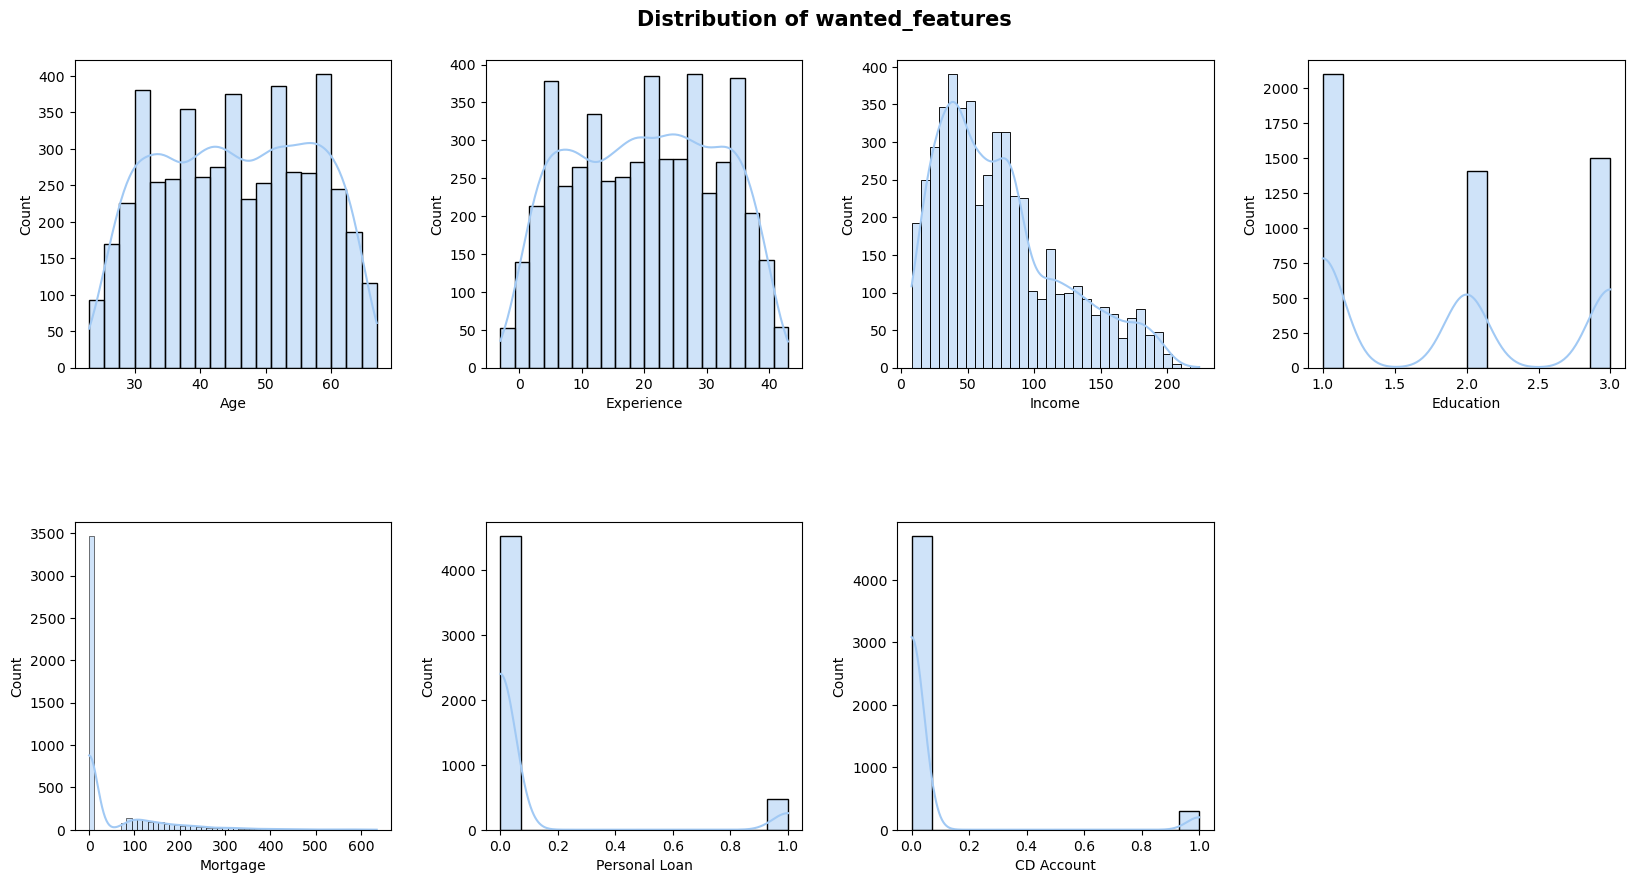

In [66]:

#1)Univariate analysis


# Assuming continuous_features is a list of your continuous feature column names
# Also, assuming df is your DataFrame containing these continuous features

# Set the pink color palette
sns.set_palette("pastel")

# Create subplots
fig, ax = plt.subplots(2, 4, figsize=(20, 10), gridspec_kw={"hspace": 0.5, "wspace": 0.3})

# Iterate through continuous features and create histograms
for i, col in enumerate(wanted_features):
    sns.histplot(df[col], kde=True, ax=ax[i // 4, i % 4])

# Set the overall title for the entire subplot grid
fig.suptitle('Distribution of wanted_features', fontsize=15, fontweight='bold', y=0.93)

# Remove empty subplots for the case where there are fewer features than subplots
for i in range(len(wanted_features), 2*4):
    fig.delaxes(ax.flatten()[i])
    
    
# Remove the last empty subplot
fig.delaxes(ax[1, 3])

# Display the plots
plt.show()



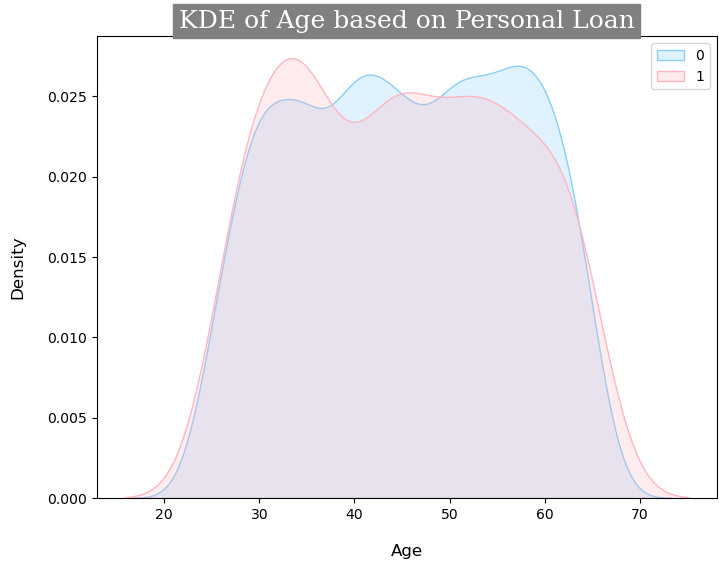

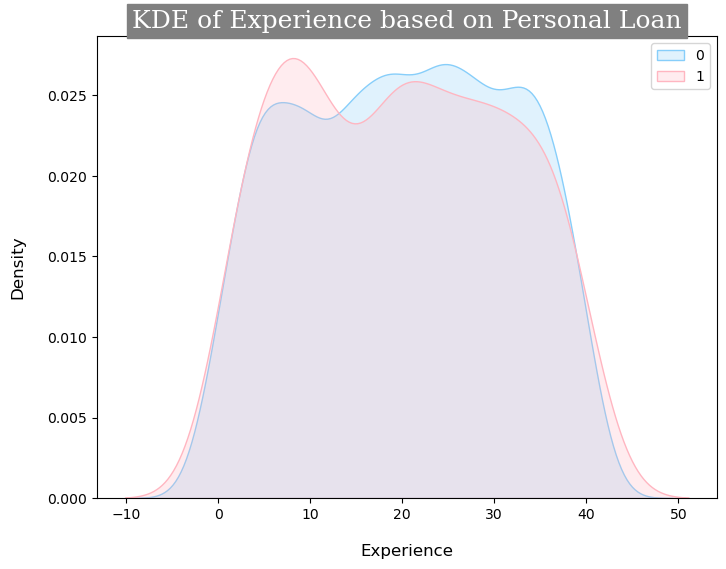

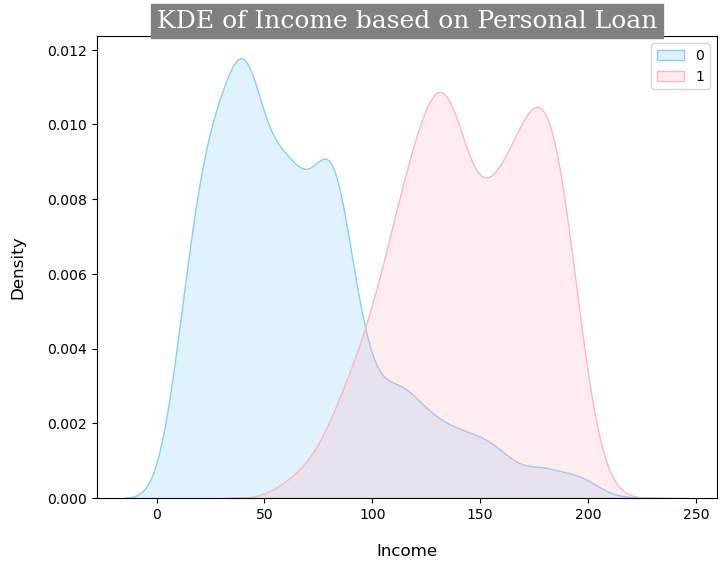

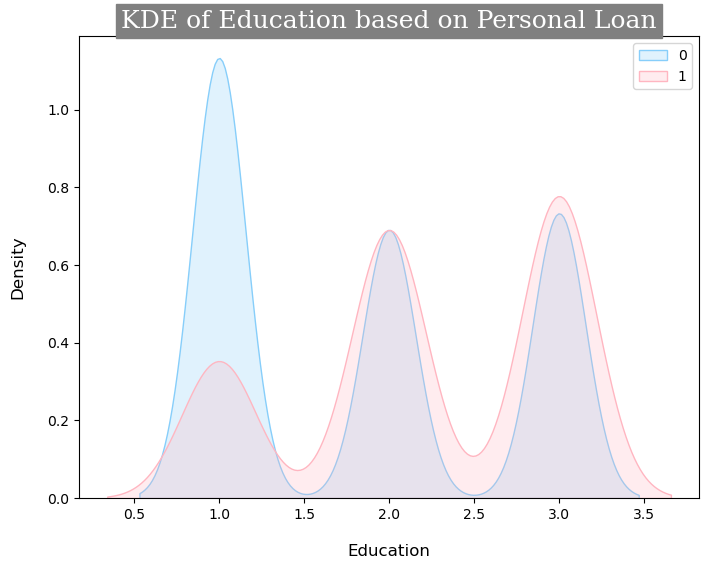

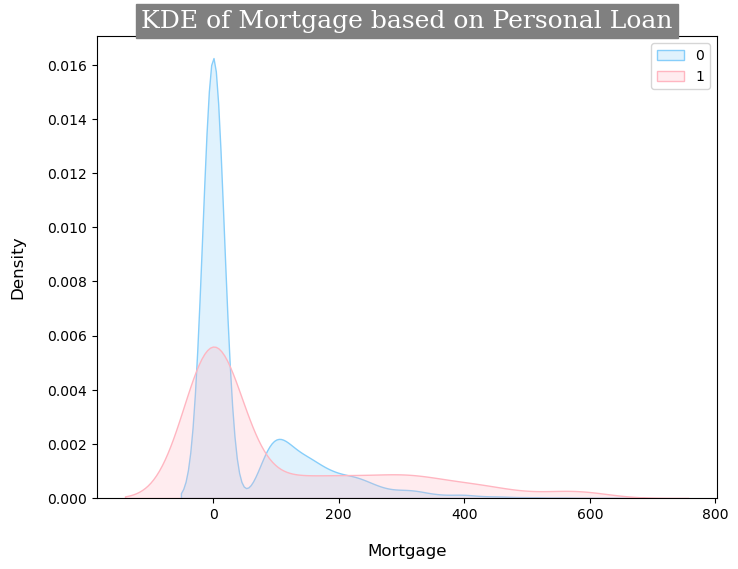

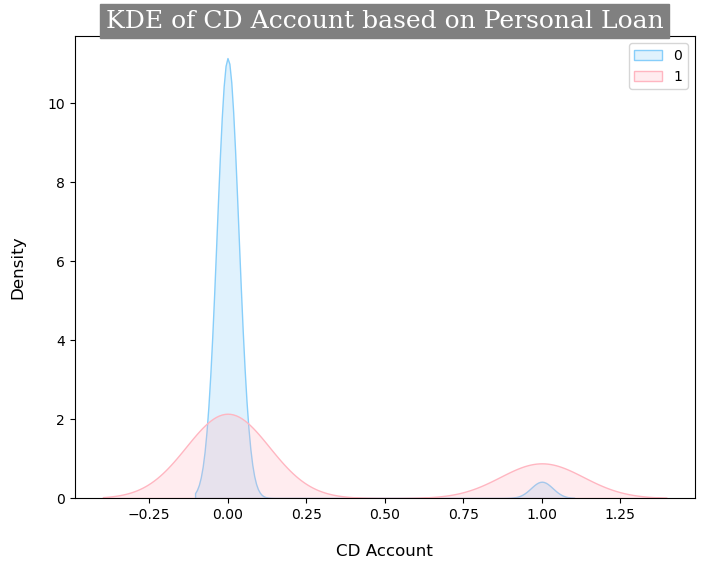

In [82]:
#2)Kernel Density Estimation (KDE) of wanted_features by Personal Loan
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming wanted_features is a DataFrame with wanted_features and 'Personal Loan'
# Adjust the column names as needed

font1 = {'family': 'serif', 'size': 18}
font2 = {'family': 'serif', 'size': 15}

# Set the color palette
sns.set_palette(['lightskyblue', 'lightpink', 'cadetblue', 'yellowgreen'])

for j, col in enumerate(wanted_features.drop(columns=['Personal Loan'])):
    plt.figure(figsize=(8, 6))

    for i, label in enumerate(wanted_features["Personal Loan"].unique().tolist()):
        sns.kdeplot(wanted_features.loc[wanted_features['Personal Loan'] == label, col], label=label, fill=True)

    plt.title(f"KDE of {col} based on Personal Loan", backgroundcolor='grey', color='white', fontdict=font1)
    plt.xlabel(f"{col}", fontsize=12, labelpad=16)
    plt.ylabel("Density", fontsize=12, labelpad=16)

    plt.legend()
    plt.show()

In [67]:

# for every columns values with acceptance number

import plotly.express as px

colors = ['lightskyblue', 'lightpink', 'cadetblue', 'lightskyblue', 'lightpink', 'cadetblue','yellowgreen']
List = ['Age','Experience','Income','Education','Mortgage','Personal Loan','CD Account']
color_map = {0: 'lightskyblue', 1: 'cadetblue'}

for i in List:
    fig = px.histogram(df, x=i, text_auto='1f',
                       title=i, color_discrete_map=color_map, color='Personal Loan')

    fig.update_xaxes(title_text=f'{i}')
# Add this line to update y-axis title
    fig.update_yaxes(title_text='Count') 
    fig.update_layout(bargap=0.2)
    fig.show()

In [68]:
# pre-processing

# here ccAvg in object datatype but we consider to predict pesonal Loan using only age, income, Education, Mortgage, Credit card, CD Account
#so then check any missing values are there
df.isnull().sum()


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [69]:
# no null values here
#check any duplicate raws are in the data set()
df.duplicated().sum()


0

In [10]:
# here no string  data types so , no need to change string to int
#selecting rows where the 'Experience' is less than 0. 
df2 = df[df['Experience']<0]

# display where experiece <0
df2
# in this data set experience are in negative values also there


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2/30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1/70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0/30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1/75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0/20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2/40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2/30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0/30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1/70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7/20,1,0,0,1,0,0,1


In [83]:
# Impute negative values with the median of non-negative values
median_experience = df['Experience'][df['Experience'] >= 0].median()
df['Experience'] = df['Experience'].apply(lambda x: x if x >= 0 else median_experience)


In [84]:
#check any negative values are there
df3 = df[df['Experience']<0]
df3.shape




#so by the output no negative values occur

(0, 14)

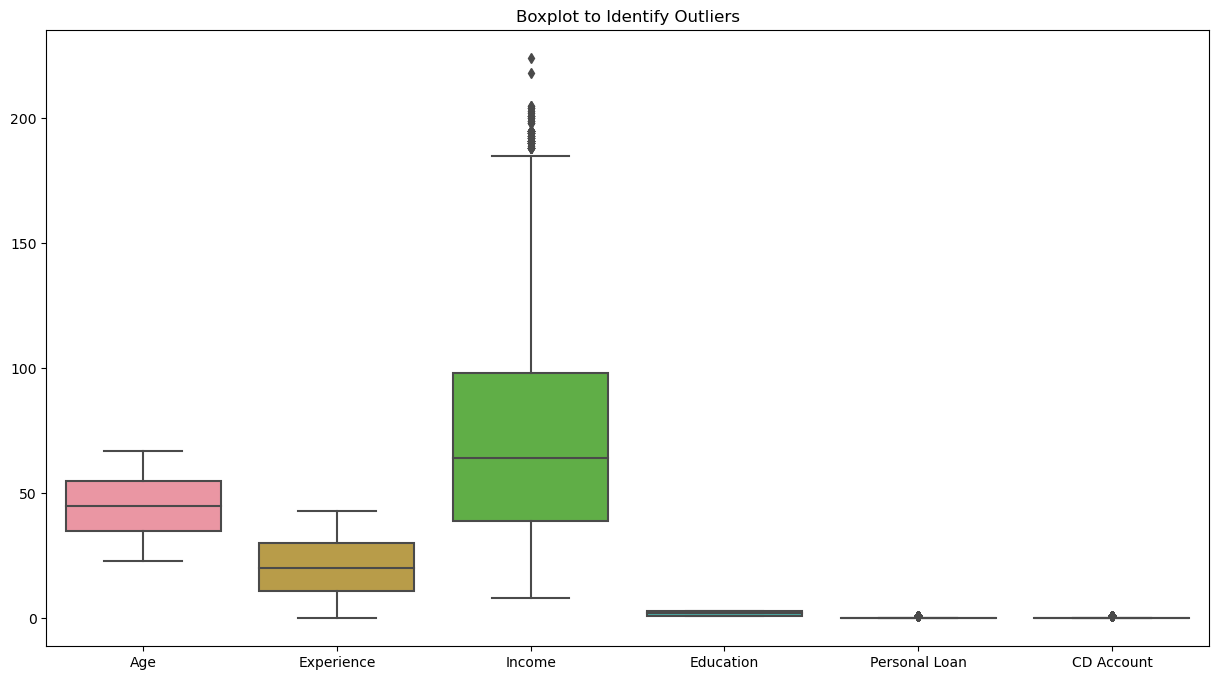

In [85]:
# box wisker plots for out liers


plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['Age', 'Experience', 'Income', 'Education','Personal Loan','CD Account']])
plt.title('Boxplot to Identify Outliers')
plt.show()




In [71]:
# remove out liers
# Handling outliers using IQR (Interquartile Range)
def remove_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])
    
    
    
    #------------------------------
    # Remove outliers for specified columns
columns_with_outliers = ['Income']
for column in columns_with_outliers:
    remove_outliers(column)
    
    # Drop rows with missing values after outlier removal
df = df.dropna(axis=0)


    

In [86]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3.0,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4.0,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39.0,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40.0,49,90034,3,0/50,2,0,0,0,0,1,0


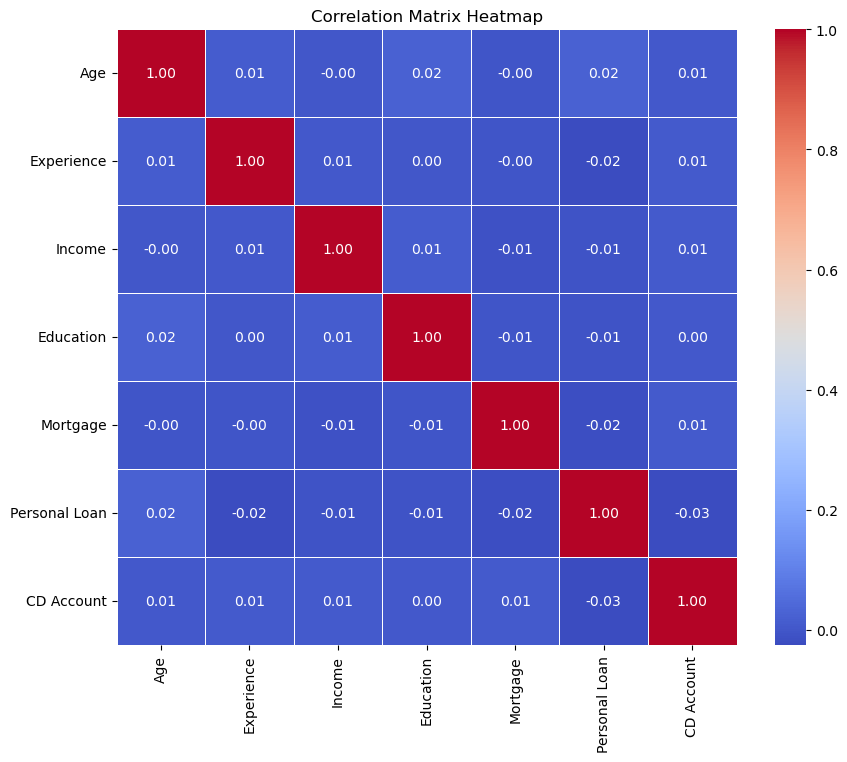

In [79]:
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=(4904, 7))
columns = ['Age', 'Experience', 'Income', 'Education', 'Mortgage', 'Personal Loan', 'CD Account']
df = pd.DataFrame(data, columns=columns)

# Subset the DataFrame for the selected columns
selected_columns = ['Age', 'Experience', 'Income', 'Education', 'Mortgage', 'Personal Loan', 'CD Account']
subset_df = df[selected_columns]

# Calculate the correlation matrix for the subset
correlation_matrix = subset_df.corr()

# Plot heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set plot title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()




In [73]:
# feature scalling


# Assuming your dataset is stored in 'df' variable
# Extracting features and target variable
X = df[['Age', 'Experience', 'Income', 'Education', 'Mortgage', 'CD Account']]
y = df['Personal Loan']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)





In [74]:
#splitting the data 
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [87]:
# Checking for Overfitting
suggested_k = int(np.sqrt(len(X_train)))
knn_model = KNeighborsClassifier(n_neighbors=suggested_k)

# Training the KNN model on the scaled training data
knn_model.fit(X_train, y_train)

# Evaluating the model on the training set
y_train_pred = knn_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)

# Evaluating the model on the testing set
y_test_pred = knn_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Print the training and testing accuracies for the suggested k
print(f'Suggested k = {suggested_k} Training Accuracy = {accuracy_train:.4f}, Testing Accuracy = {accuracy_test:.4f}')

# Print the classification report for the testing set
classification_rep_test = classification_report(y_test, y_test_pred)
print("\nClassification Report (Testing Set):\n", classification_rep_test)

Suggested k = 62 Training Accuracy = 0.9439, Testing Accuracy = 0.9480

Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       900
           1       0.89      0.42      0.57        81

    accuracy                           0.95       981
   macro avg       0.92      0.71      0.77       981
weighted avg       0.95      0.95      0.94       981



In [88]:


# Model Training (Naive Bayes in this case)
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Check for Overfitting
y_train_pred = naive_bayes_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)

y_test_pred = naive_bayes_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy = {accuracy_train:.4f}')
print(f'Testing Accuracy = {accuracy_test:.4f}')

# Classification Report
classification_rep_test = classification_report(y_test, y_test_pred)
print("\nClassification Report (Testing Set):\n", classification_rep_test)


Training Accuracy = 0.9054
Testing Accuracy = 0.9083

Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       900
           1       0.45      0.47      0.46        81

    accuracy                           0.91       981
   macro avg       0.70      0.71      0.70       981
weighted avg       0.91      0.91      0.91       981



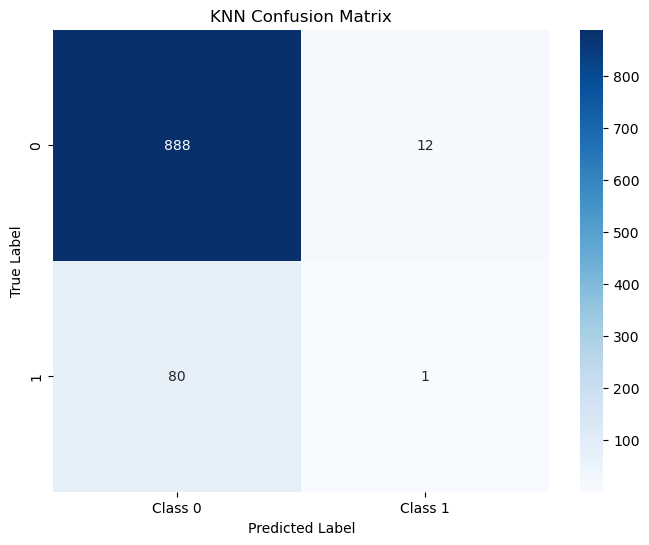

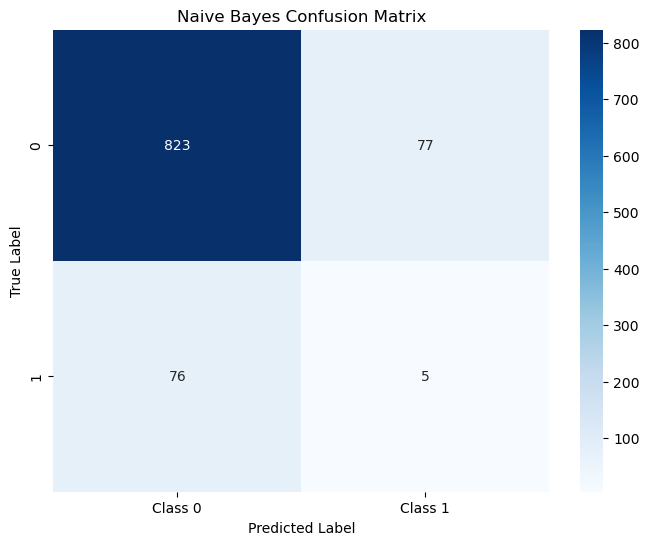

In [89]:



# Confusion matrix for KNN
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)

# Confusion matrix for Naive Bayes
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)

# Plot confusion matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'])
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot confusion matrix for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'])
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [77]:
#check with the new_data
# Assuming you have new data in a variable 'new_data'
new_data = np.array([[30, 2, 50, 0, 60, 1]])
# Predictions using KNN
knn_new_predictions = knn_classifier.predict(new_data)

# Predictions using Naive Bayes
nb_new_predictions = nb_classifier.predict(new_data)

# Display the predictions
print("KNN Predictions:", knn_new_predictions)
print("Naive Bayes Predictions:", nb_new_predictions)


KNN Predictions: [0]
Naive Bayes Predictions: [1]
